<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [5]:
import pandas as pd              
import seaborn as sns            
import os
import warnings
os.chdir(r"C:\Solutions")

%pylab inline

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

Populating the interactive namespace from numpy and matplotlib


In [6]:
energieM = pd.read_csv('donnees/GroundStateEnergies.16.242.Molecules.csv',)
energieM = energieM.iloc[:,1:]
energieM.head()

X0         X1         X2         X3         X4         X5  \
0  73.516695  17.817765  12.469551  12.458130  12.454607  12.447345   
1  73.516695  20.649126  18.527789  17.891535  17.887995  17.871731   
2  73.516695  17.830377  12.512263  12.404775  12.394493  12.391564   
3  73.516695  17.875810  17.871259  17.862402  17.850920  17.850440   
4  73.516695  17.883818  17.868256  17.864221  17.818540  12.508657   

          X6         X7         X8         X9  ...  X1266  X1267  X1268  \
0  12.433065  12.426926  12.387474  12.365984  ...    0.0    0.0    0.0   
1  17.852586  17.729842  15.864270  15.227643  ...    0.0    0.0    0.0   
2  12.324461  12.238106  10.423249   8.698826  ...    0.0    0.0    0.0   
3  12.558105  12.557645  12.517583  12.444141  ...    0.0    0.0    0.0   
4  12.490519  12.450098  10.597068  10.595914  ...    0.0    0.0    0.0   

   X1269  X1270  X1271  X1272  X1273  X1274        Eat  
0    0.5    0.0    0.0    0.0    0.0    0.0 -19.013763  
1    0.0    0.0    0.0    0.0    0.0    0.0 -10.161019  
2    0.0    0.0    0.0    0.0    0.0    0.0  -9.376619  
3    0.0    0.0    0.0    0.0    0.0    0.0 -13.776438  
4    0.0    0.0    0.0    0.0    0.0    0.0  -8.537140  

[5 rows x 1276 columns]

In [7]:
energieM.shape

(16242, 1276)

In [8]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
modelStd = StandardScaler()
x = modelStd.fit_transform(energieM.drop(columns='Eat'))

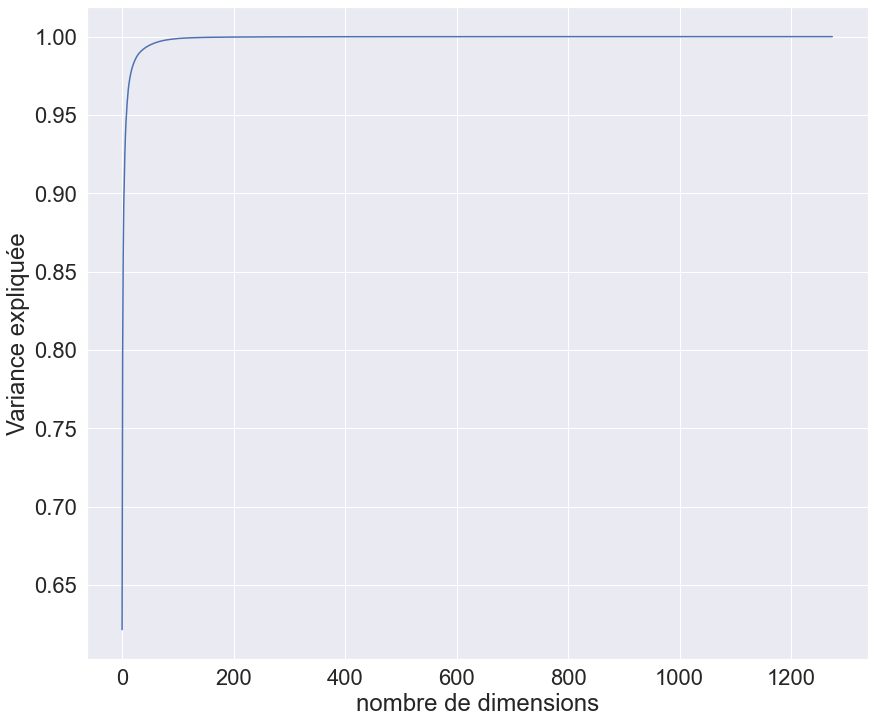

In [9]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)
plt.figure(figsize=(14,12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de dimensions')
plt.ylabel('Variance expliquée');

In [10]:
sum(pca.explained_variance_ratio_.cumsum()*100 <= 95) + 1

9

In [11]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_red = pca.fit_transform(x)
print('explained variance ratio (first two components): %s' % str(np.round(pca.explained_variance_ratio_*100,2)))

explained variance ratio (first two components): [62.16 17.49  6.41  3.21  1.83  1.48  1.13  0.84  0.64]


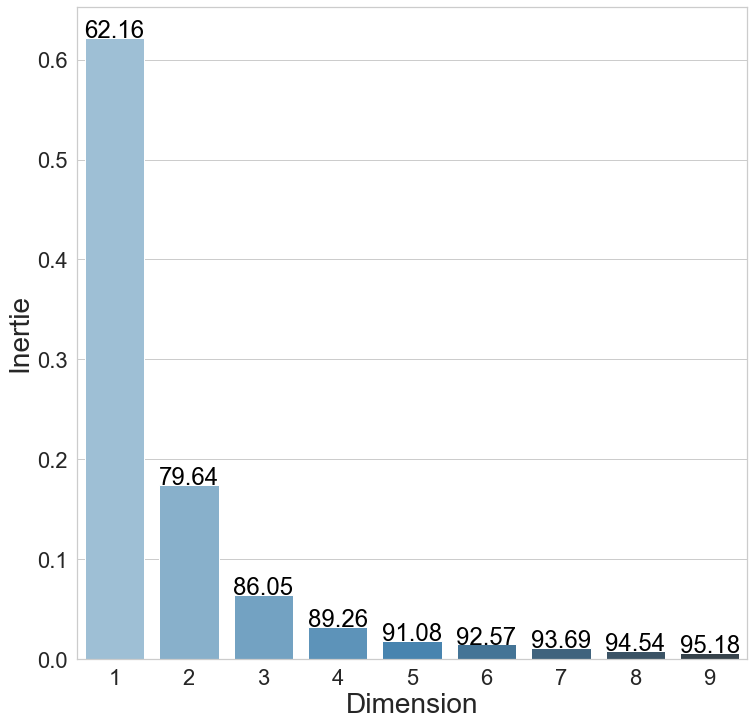

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=28)
font2 = fm.FontProperties(size=28)

inertie = pd.DataFrame(pca.explained_variance_ratio_,columns=['Inertie']) 
inertie['label'] = np.round(pca.explained_variance_ratio_.cumsum()*100,2)
inertie['Dimension'] = range(1,10)

plt.figure(figsize=(12,12))
sns.set_style("whitegrid")
g = sns.barplot(x="Dimension",y='Inertie', data=inertie, palette="Blues_d")
for index, row in inertie.iterrows():
    g.text(row.name,row.Inertie, row.label, color='black', ha="center")
    
plt.xlabel('Dimension', fontproperties=font1)
plt.ylabel('Inertie', fontproperties=font1)
plt.show()

In [13]:
inertie

Inertie  label  Dimension
0  0.621564  62.16          1
1  0.174865  79.64          2
2  0.064062  86.05          3
3  0.032085  89.26          4
4  0.018266  91.08          5
5  0.014849  92.57          6
6  0.011256  93.69          7
7  0.008407  94.54          8
8  0.006401  95.18          9

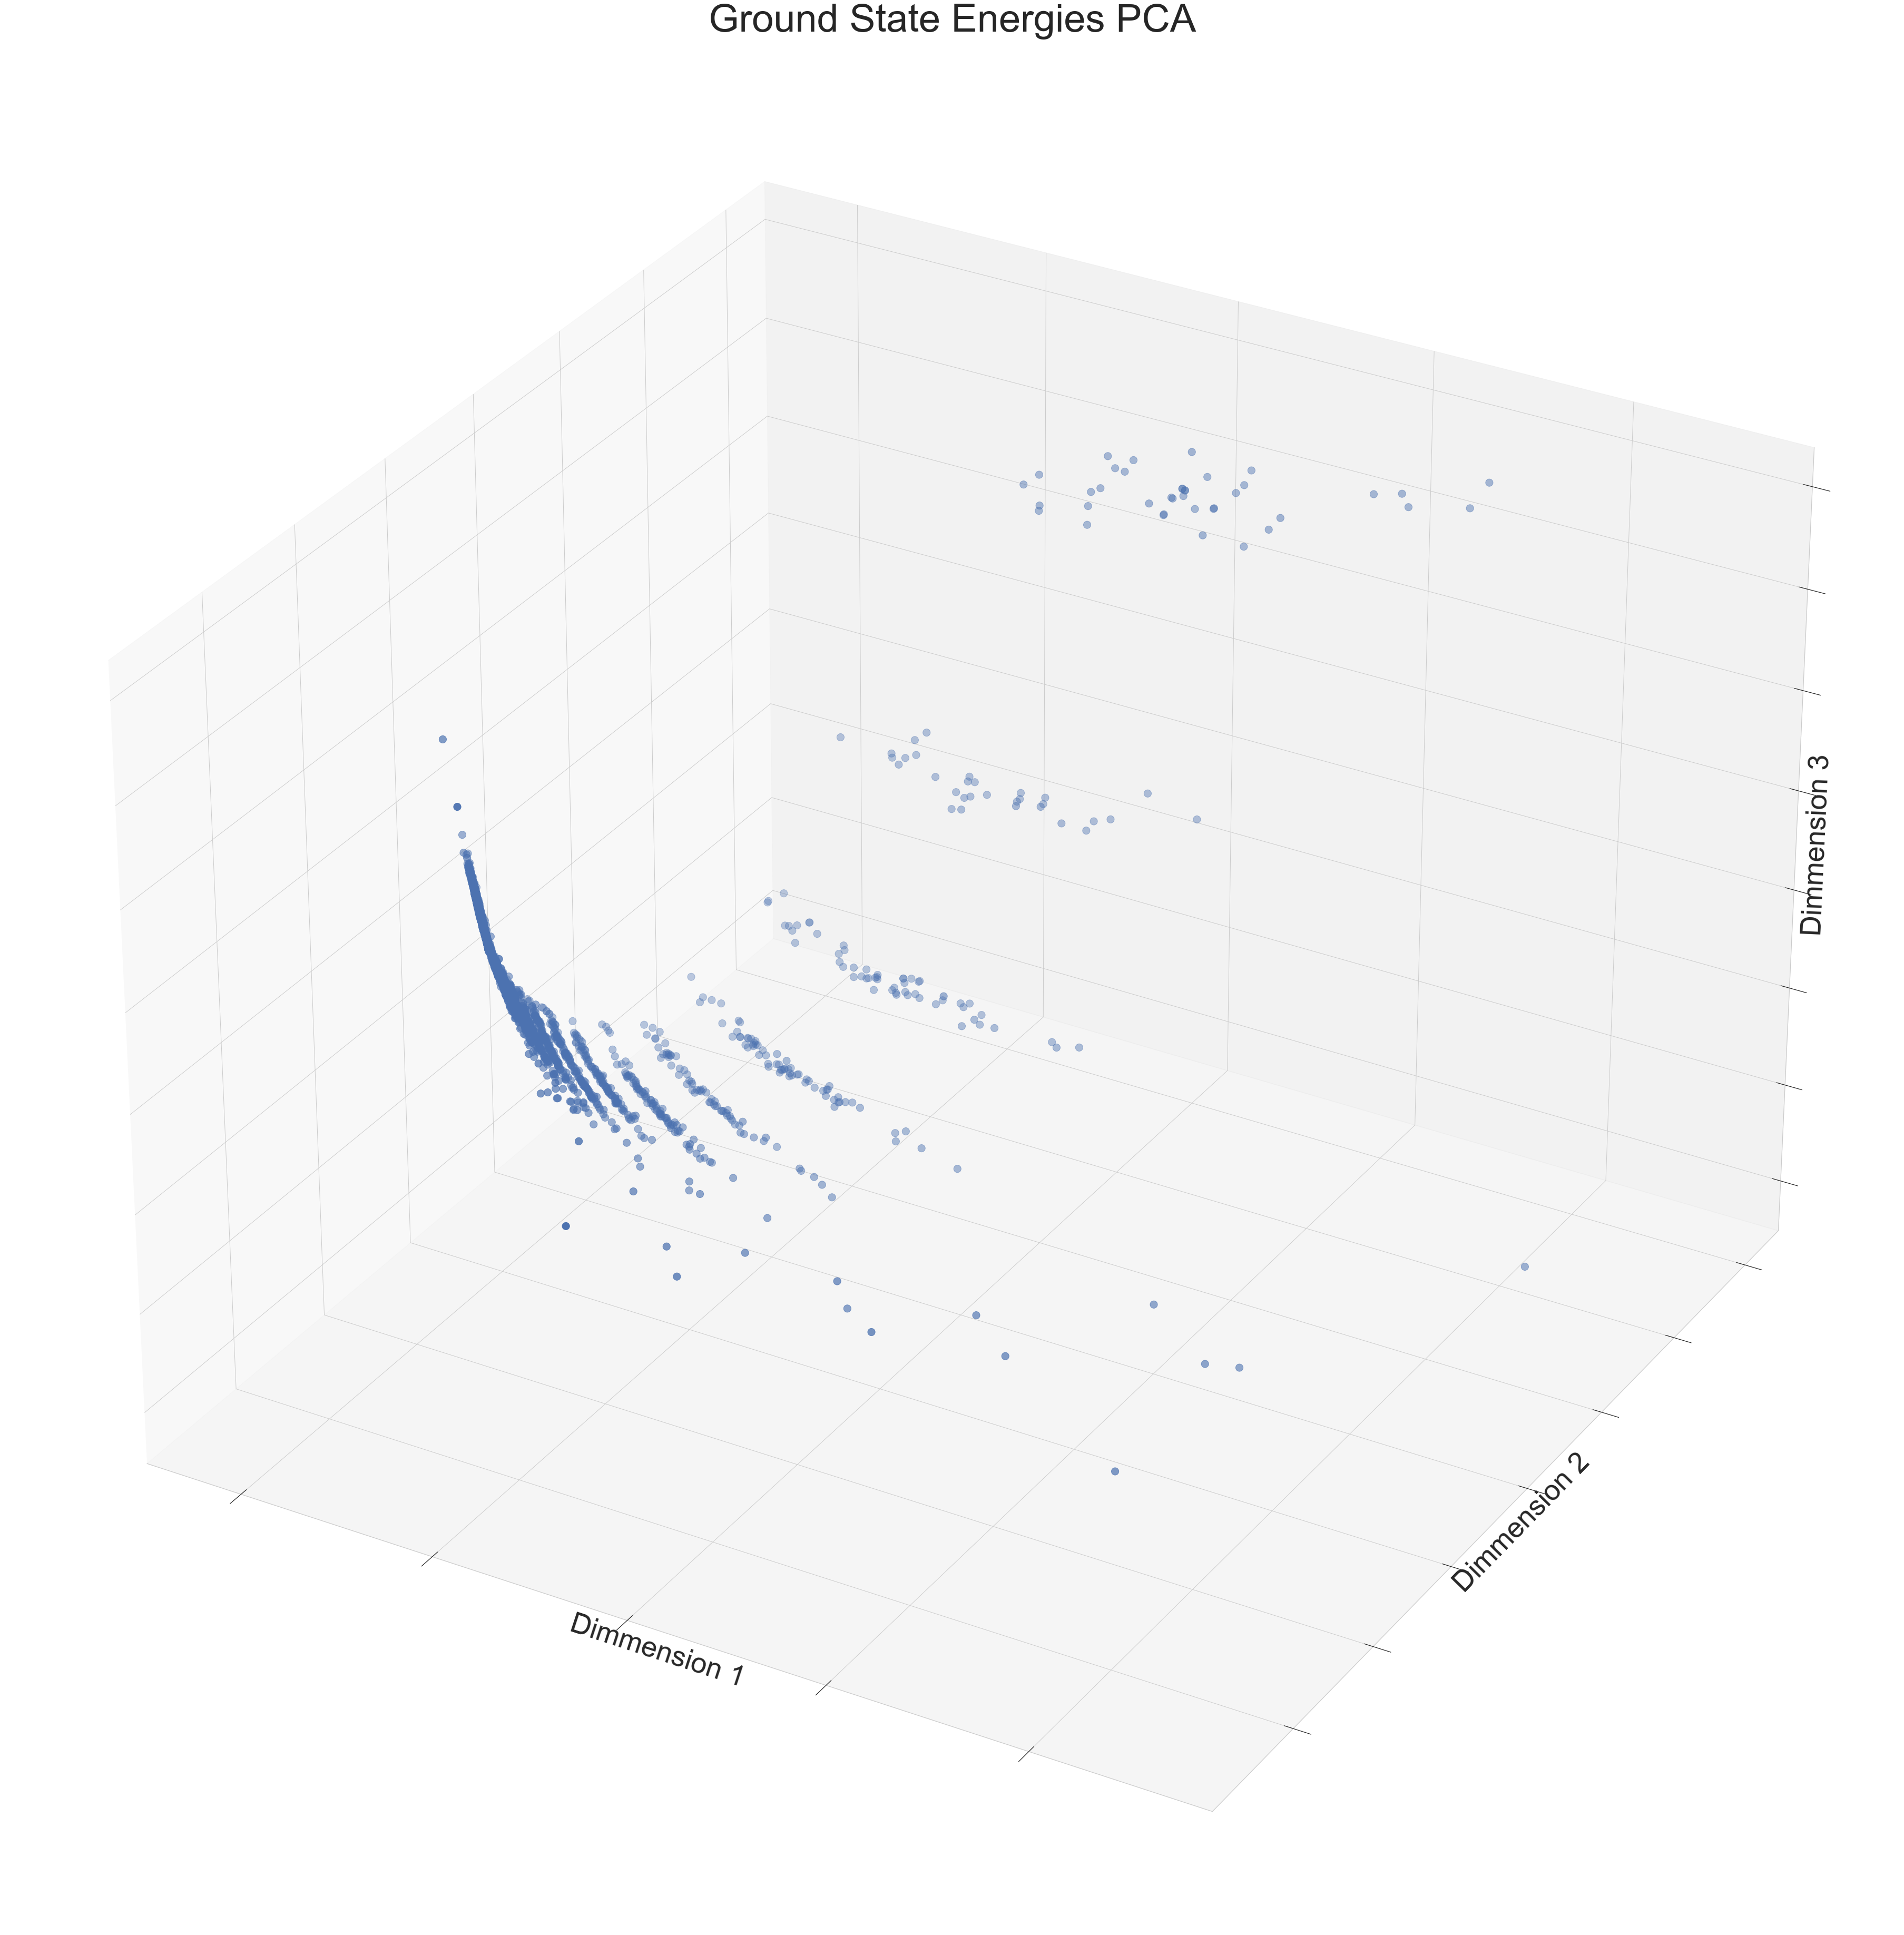

In [14]:
from mpl_toolkits.mplot3d import Axes3D

ax = Axes3D(plt.figure(figsize=(50,50)))
ax.set_title('Ground State Energies PCA', size=74)
ax.scatter(x_red[:,0],x_red[:,1],x_red[:,2],s=200)
ax.set_xlabel('Dimmension 1', size=54)
ax.set_ylabel('Dimmension 2', size=54)
ax.set_zlabel('Dimmension 3', size=54)
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())
plt.show() 

In [16]:
donnees = pd.DataFrame(x_red,index=energieM.index)
donnees.columns = ['Dim%02d'%int(x+1) for x in list(donnees.columns)]
donnees['Eat'] = energieM.Eat
donnees.head()

Dim01      Dim02     Dim03      Dim04      Dim05      Dim06      Dim07  \
0  97.349694  53.585886  2.016784  17.668546  29.544137 -42.233008  16.306104   
1  -9.051930   2.515048  2.101880   3.138670  -2.851821  -0.155103   0.965635   
2 -12.302553   8.072663 -5.147103  -2.873533   2.040824  -0.153542  -2.579587   
3   1.418797  -5.410751 -0.074740  -3.958888   4.419297   0.869389   0.719572   
4 -13.057628   8.963680 -5.709322  -2.783975   1.613618   0.003763  -1.339319   

      Dim08     Dim09        Eat  
0 -8.142945 -9.658568 -19.013763  
1  0.342347 -0.729784 -10.161019  
2 -1.209652  0.588496  -9.376619  
3  1.075371 -1.059044 -13.776438  
4 -0.642500  0.203241  -8.537140

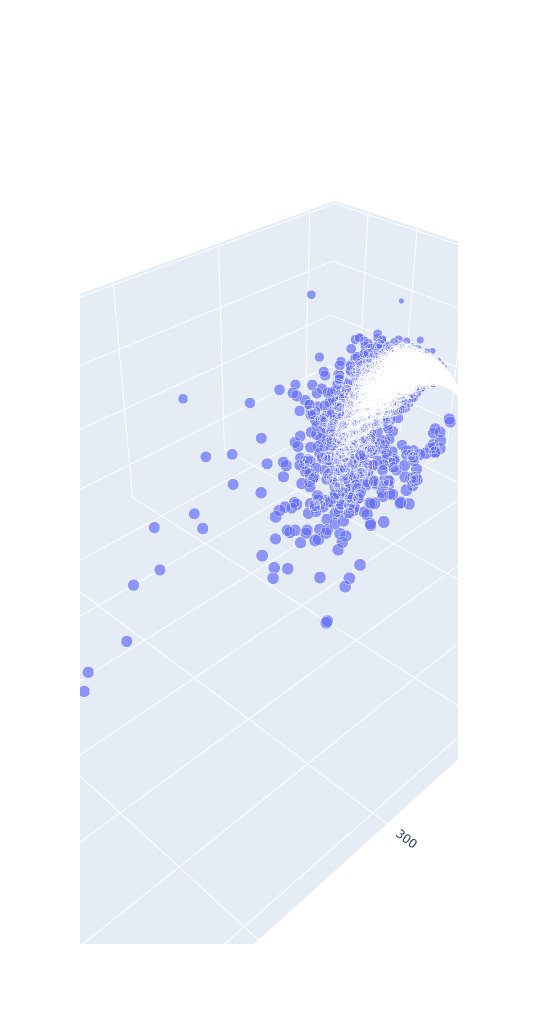

In [21]:
import plotly.express as px

fig = px.scatter_3d(donnees, 
                    x='Dim01', 
                    y='Dim02', 
                    z='Dim03',
                    size=donnees.Eat.abs(),
                    width=1024,
                    height=1024,
                   )

fig.show()